In [10]:
allowed_cars=["HAP515"]
allowed_cars

['HAP515']

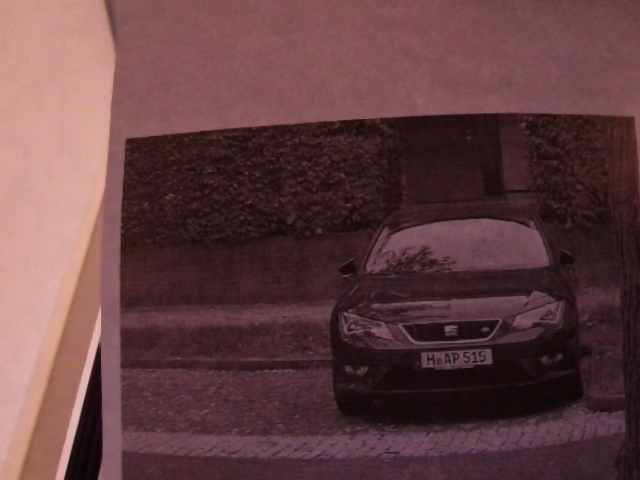

In [25]:
import cv2
from PIL import Image
from IPython.display import display

# Initialisieren Sie die Kamera
cap = cv2.VideoCapture(0) # '0' ist für die Standardkamera Ihres Computers.

try:
    # Einzelnes Bild aufnehmen
    ret, frame = cap.read()
    
    # Überprüfen Sie, ob das Bild korrekt aufgenommen wurde
    if ret:
        # Konvertieren Sie das Bild von BGR zu RGB
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Erstellen Sie ein PIL.Image aus dem RGB-Frame
        pil_image = Image.fromarray(rgb_frame)
        
        # Zeigen Sie das PIL.Image an
        display(pil_image)
finally:
    # Vergessen Sie nicht, die Kamera wieder freizugeben
    cap.release()




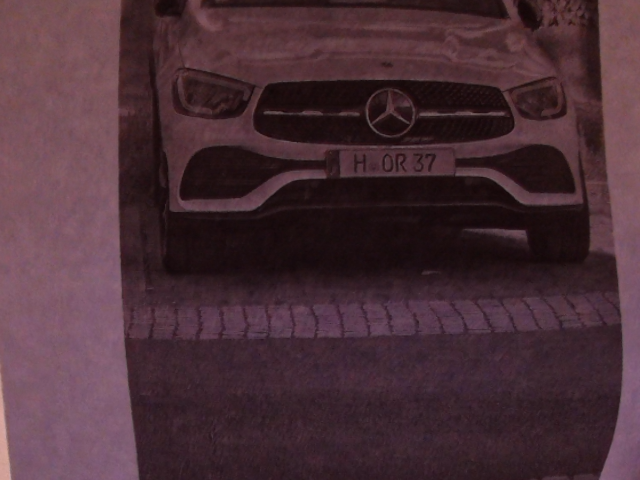

In [18]:
import cv2
from PIL import Image
from IPython.display import display

# Initialisieren Sie die Kamera
cap = cv2.VideoCapture(0) # '0' ist für die Standardkamera Ihres Computers.

try:
    # Einzelnes Bild aufnehmen
    ret, frame = cap.read()
    
    # Überprüfen Sie, ob das Bild korrekt aufgenommen wurde
    if ret:
        # Konvertieren Sie das Bild von BGR zu RGB
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Erstellen Sie ein PIL.Image aus dem RGB-Frame
        pil_image = Image.fromarray(rgb_frame)
        
        # Zeigen Sie das PIL.Image an
        display(pil_image)
finally:
    # Vergessen Sie nicht, die Kamera wieder freizugeben
    cap.release()




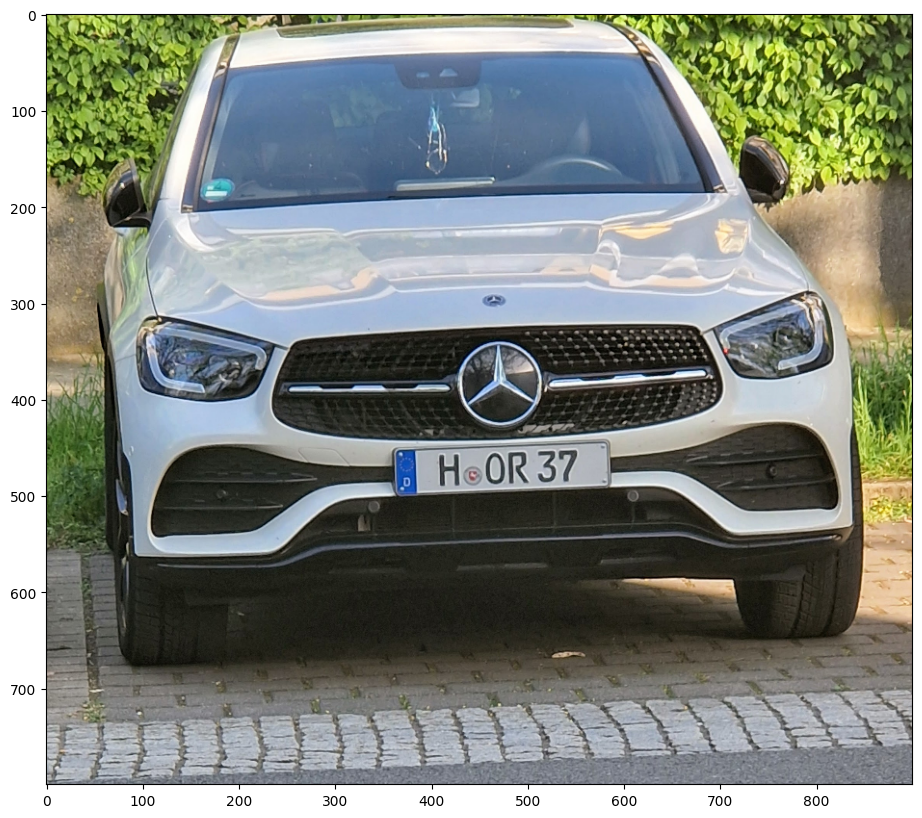

In [14]:
# load car.jpg and display it
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

plt.rcParams['figure.figsize'] = [20, 10]
im = Image.open("../../azure/OCR/car2.jpg")

# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(im)

plt.show()

In [12]:
import easyocr
import cv2
from PIL import Image
import numpy as np

# Load the image using PIL
image_path = "../../azure/OCR/car2.jpg"
pil_image = Image.open(image_path)

# Convert PIL image to OpenCV format
open_cv_image = cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)

# Initialize EasyOCR reader
reader = easyocr.Reader(['de'])

# Use EasyOCR to read the text from the license plate area
result = reader.readtext(open_cv_image)

# Extract the text from the result
easyocr_text = " ".join([res[1] for res in result])


print("OCR Result:", easyocr_text)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


OCR Result: 0 HeOR 37


In [13]:
# Load the Model
import re

from transformers import DonutProcessor, VisionEncoderDecoderModel
import torch
from PIL import Image

processor = DonutProcessor.from_pretrained(
    "naver-clova-ix/donut-base-finetuned-cord-v2")
model = VisionEncoderDecoderModel.from_pretrained(
    "naver-clova-ix/donut-base-finetuned-cord-v2")

# Load the image
image_path = "../../azure/OCR/car2.jpg"
image = Image.open(image_path).convert("RGB")

# Use the processor on the correctly loaded image
pixel_values = processor(image, return_tensors="pt").pixel_values


device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

# prepare decoder inputs
task_prompt = "<s_cord-v2>"
decoder_input_ids = processor.tokenizer(
    task_prompt, add_special_tokens=False, return_tensors="pt").input_ids


outputs = model.generate(
    pixel_values.to(device),
    decoder_input_ids=decoder_input_ids.to(device),
    max_length=model.decoder.config.max_position_embeddings,
    pad_token_id=processor.tokenizer.pad_token_id,
    eos_token_id=processor.tokenizer.eos_token_id,
    use_cache=True,
    bad_words_ids=[[processor.tokenizer.unk_token_id]],
    return_dict_in_generate=True,
)

sequence = processor.batch_decode(outputs.sequences)[0]
sequence = sequence.replace(processor.tokenizer.eos_token, "").replace(
    processor.tokenizer.pad_token, "")
# remove first task start token
sequence = re.sub(r"<.*?>", "", sequence, count=1).strip()
print(processor.token2json(sequence))

{'nm': 'H OR 37'}


In [27]:
seq = processor.token2json(sequence)
seq=seq["text_sequence"].replace(".", "").replace(" ", "")
cut_off_index = seq.find('<')
if cut_off_index != -1:  # Find gibt -1 zurück, wenn das Zeichen nicht gefunden wird
    seq = seq[:cut_off_index]
print(seq)


HAP515


In [28]:
found = False
for car in allowed_cars:
    if car == seq:
        print("Car is allowed")
        found = True
        break

if not found:
    print("Car is not allowed")


Car is allowed
